# AI4GSD Demo
------------------------------------------
## Field validation with BaseGrain example
------------------------------------------
#### Table of contents
#### 0. Installing requried packages (please restart the kernel after installation)
#### 1. Importing required packages
#### 2. Defining working directory
#### 3. Extracting or copying your videos/photos to desired folder
#### 4. Obtaining scales from AI for validation purpuse
#### 5. Obtaining segmentation of anthropogenic objects
#### 6a. Obtaining minimum grain size and median size from field data for comparison
#### 6b. Obtaining grain size data
#### 6c. Computing relative error between AI4GSD and field for D50
#### 7. Applying quality control

#### * Please contact Yunxiang Chen, yunxiang.chen@pnnl.gov for reporting errors
##### ** The image and data are from BASEGRAIN: https://basement.ethz.ch/download/tools/basegrain.html, please cite the following references if reusing the data:
##### [1] BASEGRAIN: https://basement.ethz.ch/download/tools/basegrain.html
##### [2] Detert, M., & Weitbrecht, V. (2012). Automatic object detection to analyze the geometry of gravel grains - A free stand-alone tool. In River Flow 2012 - Proceedings of the International Conference on Fluvial Hydraulics (pp. 595–600). Taylor and Francis. https://people.ee.ethz.ch/~basement/baseweb/download/tools/basegrain/RF2012_MDEWV_CH079.pdf

------------------------------------------
### 0. Installing requried packages (please restart the kernel after installation)

In [1]:
#!pip install --user natsort
#!pip install --user ismember

### 1. Importing required packages

In [2]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import AI4GSD

### 2. Defining working directory

In [3]:
WorkDir = os.path.dirname(os.getcwd())
foldername = '20250916_YC_FieldValidateBaseGrain'  
PhotoDir = WorkDir + os.sep + 'Demo_Data' + os.sep + foldername                

### 3. Extracting or copying your videos/photos to desired folder

In [4]:
AI4GSD.getPhotos(PhotoDir,nframe=2000, overwrite=True)                     # Use once.

No correction needed, copied directly: BASEGRAIN2p2georef1775x1989.jpg



### 4. Obtaining scales from AI, drone flight data, or manual measurements

In [5]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.OverWriteAll = True                                                     # Overwrite everything if True.
PP.OverWriteScaleFile = True
PP.OverWriteScaleRows = True
PP.ScaleSource = 'default'                                                 # Use AI option.
PP.ModelName = 'YOLO11m.1280.20250825'                                     # Which AI to use.
PP.ComputingSource = 'local'                                               # What computing resource to use.
PP.ImageSizeFactor = 1                                                     # Do you need to user a larger image size for inference?
PP.YOLOSave = False                                                        # Need to save AI prediction to folder.
PP.UserScaleFile = os.path.join(WorkDir,'Scales','Scales_V3_All.csv')
PP.SiteID = 'BG'
scales = AI4GSD.metadata(PP)

Generating scale file for: 20250916_YC_FieldValidateBaseGrain
1/1: photo 1/1, BASEGRAIN2p2georef1775x1989.jpg, scale Line, res 0.56 mm/px, status -1, (100.00%), 0.01 s
Total time: 0.10 s, time per photo 0.10 s
-----------------------------------------------------------------



### 5. Obtaining segmentation of anthropogenic objects

In [6]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.FolderLevel = 'L1'
PP.ModelName = 'YOLO11m.640.20250527'
PP.ObjectName = 'anthro'
PP.OverWriteSegementation = True
PP.YOLOSave = False
PP.YOLOIOU = 0.45
PP.ComputingSource = 'local'
PP.ImageSizeType = 'default'
PP.ImageSizeFactor=1
#PP.SegmentationClassName = ['road','people','person']                     # What object class need to track.
#AI4GSD.background(PP)                                                     # Anthropogenic object removal is not needed.

### 6a. Obtaining minimum grain size and median size from field data for comparison

In [7]:
gsdname = 'BASEGRAIN2p2georef1775x1989_b_meters_photo_analysis_Fehr.csv'
gsdcsv = os.path.join(PhotoDir,PP.FieldDataFolderName+'_'+PP.FieldDataConversionFolderName,gsdname)
gsdf = AI4GSD.pd.read_csv(gsdcsv)
d = gsdf['size_meters'].values
p = gsdf['percent_finer_count'].values
szmin = d.min()
order = AI4GSD.np.argsort(p)
ds = d[order]
ps = p[order]
d50 = AI4GSD.np.interp(50, ps, ds)

### 6b. Obtaining grain size data

AI4GSD: an AI and cloud powered tool for grain size quantification
AI models in use: YOLO11m.1280.20250322
Confidence thresholds in use: 0.35

-----------------------------------------------------------------
Folder name: 20250916_YC_FieldValidateBaseGrain
Output folder: 20250916_YC_FieldValidateBaseGrain_YOLO11m.1280.20250322_35
Model name: YOLO11m.1280.20250322 from local for rock detection
Model layer: 113, model parmeter: 20.05M, submodule number: 409
IOU: 0.45, YOLO confidence: 0.25, user confidence: 0.35
Number of photos: 1, number of exluded photos 0
1/1: BASEGRAIN2p2georef1775x1989.jpg, resolution 0.56 mm/px (100.00%), 0.00 s
Detected 1426 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.84, 3.06, 3.51, and 5.33 cm
Detected 1426 rocks, diagonal and area  based D10, D50, D60, and D84 are: 2.63, 5.56, 6.33, and 8.74 cm


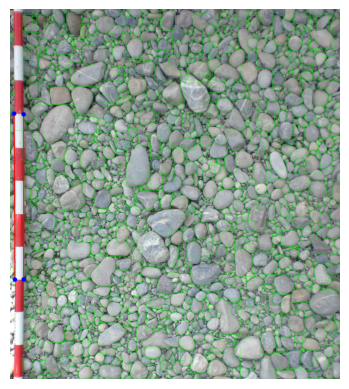

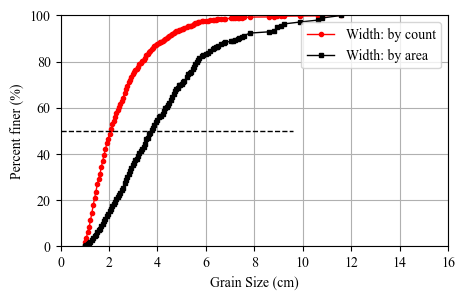

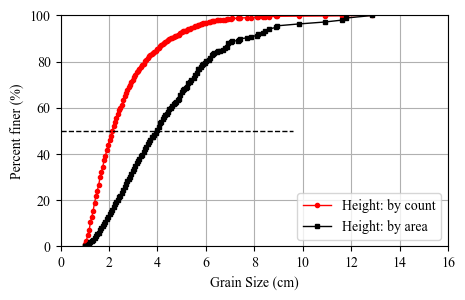

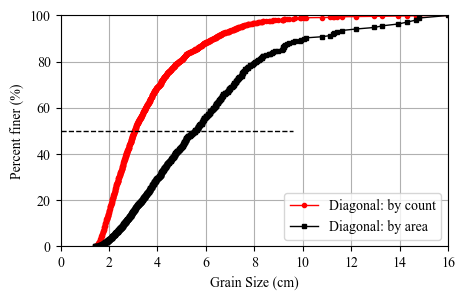

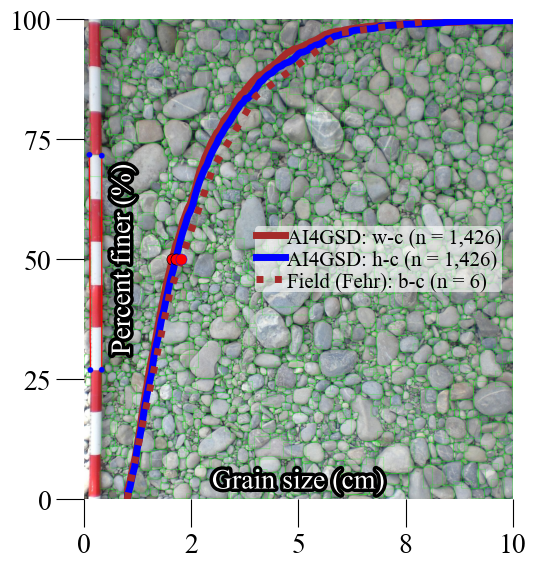

Output folder summary data to: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250916_YC_FieldValidateBaseGrain/grains_predicts/20250916_YC_FieldValidateBaseGrain_YOLO11m.1280.20250322_35/Statistics_V3_20250916_YC_FieldValidateBaseGrain_YOLO11m.1280.20250322_35.csv
Total number of grains: 1426, number of grains per photo: 1426.00
Total time: 10.30 s, time per photo 10.30 s

Output all summary data to: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250916_YC_FieldValidateBaseGrain/Statistics_V3_20250916_YC_FieldValidateBaseGrain_YOLO11m.1280.20250322_35.csv
Total execution time: 10.31 s


In [8]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.ModelName = 'YOLO11m.1280.20250322'
PP.YOLOSave = False
PP.SaveFigure = True
PP.SaveOverlayAll = True
PP.OverWriteAll = True                                                  
PP.PrintOnScreen = True
PP.GSDWeight = 'c'
PP.GSDAxis = 'wh'
PP.OverlayLableLineWidth = 1
PP.SaveOverlayResolution = 1200
PP.ConfidenceThresholdUser = 0.35
PP.CutGrainSizeMethod = 'wh'
PP.MinimumGrainSize = szmin
PP.OverlayFontSizeScaleFactor = 10
PP.OverlayLegendFontSize = 1.5
PP.OverlayFontLineWidth = 0.5
PP.OverlayGSDLineWidth = 0.5
PP.OverlayD50MarkerSize = 0.8
PP.OverlayFontBoundaryDistanceX = 0.01
PP.OverlayFontBoundaryDistanceY = 0.06
PP.OverlayFontColor = 'white'
PP.OverlayFontColorForeground = 'black'
PP.OverlayLegendLoc = 'best'
PP.OverlayGSDMaxSize = 0.1
PP.OverlayGSDXTickNumber = 5
PP.OverlayGSDYTickNumber = 5
PP.OverlayGSDColor = ['brown','blue','black','orange','cyan','red','purple']
PP.OverlayGSDManualColor = ['brown','blue','black','orange','cyan','blue','purple']
PP.OverlayGSDKey = ['AI4GSD: ','Manual','Field (Fehr): ']
PP.OverlayGSDLegend = ['w-c','h-c','r-c','area-width','area-height','area-diagonal']
PP.OverlayGSDLegendField = ['b-c','b-c'] 
PP.OverlayLegendAlpha = 0.6
PP.OverlayLegendFrame = True
PP.OverlayLegendFrame = True
PP.OverlayLegendFaceColor = 'White'
PP.OverlayLegendEdgeColor = 'none'
gsd = AI4GSD.Photo2GSD(PP)

### 6c. Computing relative error between AI4GSD and field for D50

In [9]:
d50x = gsd.D50_x_count_meter.iloc[0]
d50y = gsd.D50_y_count_meter.iloc[0]
d50xy = (d50x + d50y)/2
pe = (d50xy - d50)/d50*100
print(f'Relative error between AI and field measurement is {pe:.2f}%')

Relative error between AI and field measurement is -7.59%


### 7. Applying quality control

In [10]:
gsdqc, stqc = AI4GSD.qualityControl(PhotoDir)


Quality control summary for 20250916_YC_FieldValidateBaseGrain:
Photos: time 0.0 s, area 1.1 m2, valid area 1.1 m2 (100.0%), frame 1, valid frame 1 (100.0%)
Photos: grain number 1426, number per image 1426.0; efficiency 0.0 m2/s, 0.0 grains/s
